# MBTI Posting Dataset Preprocessing

## 1. Package & Dataset Import, EDA
* EDA: MBTI별 포스팅 개수 확인

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
# from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# nltk stopwords 설정을 위한 다운로드 진행
nltk.download('book')
# lemmatization 
nltk.download('omw-1.4')

stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package dependency_treebank is already up-to-date!
[nltk_data]    | Downloadi

In [ ]:
# Original Dataset
data = pd.read_csv('/content/drive/MyDrive/MBTI 500.csv')
data.head()

,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ


In [ ]:
len(data)

106067

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106067 entries, 0 to 106066
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   posts   106067 non-null  object
 1   type    106067 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


In [ ]:
len(data['type'].unique())

16

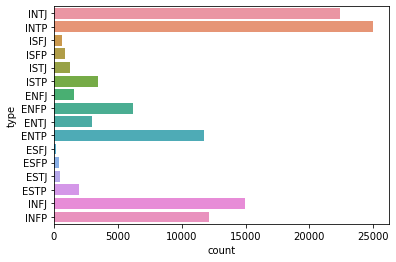

In [ ]:
sns.countplot(y='type', data=data)
plt.show()

In [ ]:
count = data.groupby('type').count()
count.sort_values(by=['posts'], ascending=False)

,posts
type,
INTP,24961
INTJ,22427
INFJ,14963
INFP,12134
ENTP,11725
ENFP,6167
ISTP,3424
ENTJ,2955
ESTP,1986


## 2. Preprocessing
* Tokenization (using NLTK)
* STOPWORDS Remove
* Normalization (using Porter Stemmer, Lemmatization)

In [ ]:
# 모델링을 위한 데이터셋 샘플링 진행
original = data.copy()
data = data.sample(frac=0.1)
len(data)

10607

In [ ]:
# data transformation
data['posts'] = data['posts'].astype(str).str.lower()
data.head(3)

,posts,type
39832,either thats one hell coincidence god must exi...,INTP
28431,say point ie love may never happen could cause...,INTP
26881,let know feminism actually mean apparent know ...,INTP


In [ ]:
# 정규식을 활용한 Tokenization (10-15초)
regexp = RegexpTokenizer('\w+')

data['token'] = data['posts'].apply(regexp.tokenize)
data.head(3)

,posts,type,token
39832,either thats one hell coincidence god must exi...,INTP,"[either, thats, one, hell, coincidence, god, m..."
28431,say point ie love may never happen could cause...,INTP,"[say, point, ie, love, may, never, happen, cou..."
26881,let know feminism actually mean apparent know ...,INTP,"[let, know, feminism, actually, mean, apparent..."


In [ ]:
# stopwords code (샘플링 전: 2분30초-3분10초)
my_stopwords = [] # custom 불용어 넣기
stopwords.extend(my_stopwords)

data['token'] = data['token'].apply(lambda x : [item for item in x if item not in stopwords])

In [ ]:
data['text'] = data['token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
data.head()

,posts,type,token,text
39832,either thats one hell coincidence god must exi...,INTP,"[either, thats, one, hell, coincidence, god, m...",either thats one hell coincidence god must exi...
28431,say point ie love may never happen could cause...,INTP,"[say, point, ie, love, may, never, happen, cou...",say point love may never happen could cause co...
26881,let know feminism actually mean apparent know ...,INTP,"[let, know, feminism, actually, mean, apparent...",let know feminism actually mean apparent know ...
64236,much easy understand consider people automobil...,ENTP,"[much, easy, understand, consider, people, aut...",much easy understand consider people automobil...
88758,internal thing give u clue thing mental model ...,INFJ,"[internal, thing, give, u, clue, thing, mental...",internal thing give clue thing mental model re...


In [ ]:
# PorterStemming 
ps = PorterStemmer()

def porter_stemming(txt):
  txt = [ps.stem(word) for word in txt.split()]
  return " ".join(txt)

data['ps'] = data['text'].apply(porter_stemming)

In [ ]:
# Lemmatization
le = WordNetLemmatizer()

def lemmatization(txt):
  txt = [le.lemmatize(word) for word in txt.split()]
  return " ".join(txt)

data['le'] = data['text'].apply(lemmatization)

In [ ]:
data.head()

,posts,type,token,text,ps,le
39832,either thats one hell coincidence god must exi...,INTP,"[either, thats, one, hell, coincidence, god, m...",either thats one hell coincidence god must exi...,either that one hell coincid god must exist ne...,either thats one hell coincidence god must exi...
28431,say point ie love may never happen could cause...,INTP,"[say, point, ie, love, may, never, happen, cou...",say point love may never happen could cause co...,say point love may never happen could caus con...,say point love may never happen could cause co...
26881,let know feminism actually mean apparent know ...,INTP,"[let, know, feminism, actually, mean, apparent...",let know feminism actually mean apparent know ...,let know femin actual mean appar know bailout ...,let know feminism actually mean apparent know ...
64236,much easy understand consider people automobil...,ENTP,"[much, easy, understand, consider, people, aut...",much easy understand consider people automobil...,much easi understand consid peopl automobil th...,much easy understand consider people automobil...
88758,internal thing give u clue thing mental model ...,INFJ,"[internal, thing, give, u, clue, thing, mental...",internal thing give clue thing mental model re...,intern thing give clue thing mental model real...,internal thing give clue thing mental model re...
